In [34]:
import numpy as np
from qiskit import *
import itertools

In [39]:
N          = 5  # Qubits
Time       = 1.
time_steps = 20
tstep      = Time/time_steps

In [40]:
circ = QuantumCircuit(N)

In [44]:
# Puertas lógicas que simulan la interacción del Hamiltoniano de Ising 

Index      = np.zeros(N)
Index[0:2] = 1.
a = list(itertools.permutations(Index))
a = list(dict.fromkeys(a))

optimized_p = {}

#Creamos un estado máximamente entrelazado

t = 0.

for l in range(time_steps) :
    
    t = t + l*tstep

    for i in range(N) :
    
        circ.h(i)
    
    circ.barrier()

    #Simulamos la evolución del estado con puertas CNOT rotaciones en z y puertas x y z.
    
    for i in range(len(a)):
    
        optimized_p[a[i]] = opt['x'][i]
        s = []
    
        for j in a[i] :
        
            if j==1 :
            
                s.append(j) 
            
        circ.cx(s[0],s[1])
        circ.rz((t/tsteps)*optimized_p[a[i]],s[1])
        circ.cx(s[0],s[1])

    
    # Puertas lógicas que simulan el término onsite y  del Hamiltoniano de Ising 

    for i in range(N) :
    
        circ.rz((t/tsteps)*opt['x'][int(N(N-1)/2)+i],i)
        circ.rx((t/tsteps)*opt['x'][int(N(N-1)/2+N)+i],i)
        
    circ.barrier()

NameError: name 'opt' is not defined

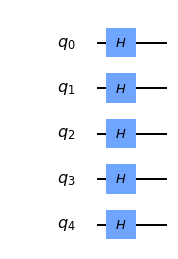

In [43]:
circ.draw(output='mpl')